In [1]:
# Imports or references modules/names: matplotlib, numpy, pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Defines or assigns variables: card_path, card_stats, deck_path, decks
card_path = "card_stats_royalapi.csv"
deck_path = "Decks - Sheet1.csv"

card_stats = pd.read_csv(card_path)
decks = pd.read_csv(deck_path)

In [ ]:
# Defines or assigns variables: card_stats_agg
card_stats_agg = (
card_stats
.groupby(["CardName", "Bracket"], as_index=False)
.agg({
"UsagePct": "mean",
"WinPct": "mean",
"Rating": "mean"
})
)

In [ ]:
# Defines or assigns variables: brackets_per_card, cards_all_four, n_card_bracket, n_unique_cards
print("Brackets covered:", card_stats["Bracket"].unique())
n_unique_cards = card_stats["CardName"].nunique()
print("Unique cards:", n_unique_cards)
brackets_per_card = card_stats_agg.groupby("CardName")["Bracket"].nunique()
cards_all_four = brackets_per_card[brackets_per_card == 4].index.tolist()
print("Cards present in all four brackets:", len(cards_all_four))


n_card_bracket = card_stats_agg.shape[0]
print("Unique card–bracket combos (after aggregation):", n_card_bracket)

Brackets covered: ['Top 200' 'Top 1000' 'All Ranked' 'Ladder']
Unique cards: 125
Cards present in all four brackets: 123
Unique card–bracket combos (after aggregation): 497


In [ ]:
# Defines or assigns variables: sub
# Defines functions: top_cards_by_usage
def top_cards_by_usage(df, bracket, top_n=1):
  sub = df[df["Bracket"] == bracket].copy()
  sub = sub.sort_values("UsagePct", ascending=False)
  return sub[["CardName", "UsagePct", "WinPct"]].head(top_n)

print("\nTop 10 by UsagePct in Top 200:")
print(top_cards_by_usage(card_stats_agg, "Top 200", top_n=10))
print("\nTop 10 by UsagePct in Top 1000:")
print(top_cards_by_usage(card_stats_agg, "Top 1000", top_n=10))
print("\nTop 10 by UsagePct in Top Ladder:")
print(top_cards_by_usage(card_stats_agg, "Ladder", top_n=10))

print("\nTop 10 by UsagePct in All Ranked:")
print(top_cards_by_usage(card_stats_agg, "All Ranked", top_n=10))


Top 10 by UsagePct in Top 200:
             CardName  UsagePct  WinPct
460    Tower Princess      93.0    48.0
27   Barbarian Barrel      45.0    49.0
138          Fireball      31.0    48.0
110    Electro Spirit      26.0    48.0
468             Vines      21.0    49.0
420         Skeletons      19.0    49.0
314           Minions      17.0    49.0
274         Lightning      15.0    48.0
444           The Log      15.0    47.0
386       Royal Ghost      14.0    49.0

Top 10 by UsagePct in Top 1000:
             CardName  UsagePct  WinPct
459    Tower Princess      92.0    49.0
26   Barbarian Barrel      41.0    50.0
137          Fireball      31.0    49.0
109    Electro Spirit      25.0    50.0
419         Skeletons      18.5    49.5
443           The Log      18.0    49.0
313           Minions      17.0    49.0
467             Vines      17.0    49.0
10             Arrows      15.0    48.0
305    Mini P.E.K.K.A      14.0    49.0

Top 10 by UsagePct in Top Ladder:
           CardName 

In [ ]:
corrs = {}
# Defines or assigns variables: corrs
for bracket, grp in card_stats_agg.groupby("Bracket"):
    if grp["UsagePct"].nunique() > 1 and grp["WinPct"].nunique() > 1:
        corrs[bracket] = grp["UsagePct"].corr(grp["WinPct"])
    else:
        corrs[bracket] = np.nan

corrs = pd.Series(corrs, name="UsageWinCorr")

print("\nPearson correlation between UsagePct and WinPct (per bracket):")
print(corrs.round(2))


Pearson correlation between UsagePct and WinPct (per bracket):
All Ranked    0.04
Ladder        0.29
Top 1000      0.14
Top 200       0.14
Name: UsageWinCorr, dtype: float64


In [ ]:
rows = []
# Defines or assigns variables: grp, meta_conc, row, rows, top_usage, total_usage
for bracket, grp in card_stats_agg.groupby("Bracket"):
    grp = grp.sort_values("UsagePct", ascending=False)
    total_usage = grp["UsagePct"].sum()
    row = {"Bracket": bracket}
    for n in (5, 10, 20):
        top_usage = grp["UsagePct"].head(n).sum()
        if total_usage != 0:
            row[f"Top {n} share"] = 100 * top_usage / total_usage
        else:
            row[f"Top {n} share"] = np.nan
    rows.append(row)

meta_conc = pd.DataFrame(rows).set_index("Bracket")

print("\nShare of total usage by the most-used cards (in %):")
print(meta_conc.round(2))


Share of total usage by the most-used cards (in %):
            Top 5 share  Top 10 share  Top 20 share
Bracket                                            
All Ranked        27.00         36.88         49.69
Ladder            29.88         41.25         55.90
Top 1000          27.76         38.60         52.98
Top 200           28.80         39.47         54.00



Largest positive usage gaps (Top 200 vs Ladder):
CardName
Barbarian Barrel    37.0
Electro Spirit      21.0
Vines               15.0
Lightning           12.0
Fireball            11.0
Minions             10.0
Royal Ghost         10.0
Skeletons           10.0
Tornado              9.0
Zappies              9.0
Goblin Hut           7.0
Lava Hound           7.0
Golem                7.0
Fisherman            7.0
Ice Wizard           7.0
Executioner          6.5
Miner                5.0
Mega Minion          5.0
Baby Dragon          4.5
Ice Golem            4.0
Name: Top200_minus_Ladder, dtype: float64

Largest negative usage gaps (Top 200 vs Ladder):
CardName
The Log            -23.0
Witch              -15.0
Arrows             -14.0
Hog Rider          -14.0
Mega Knight        -13.5
Goblin Gang        -12.0
Mini P.E.K.K.A     -11.0
Firecracker        -10.0
Goblin Barrel       -9.5
Tesla               -7.5
Princess            -7.0
Wizard              -6.5
Knight              -6.0
Electro Wizard 

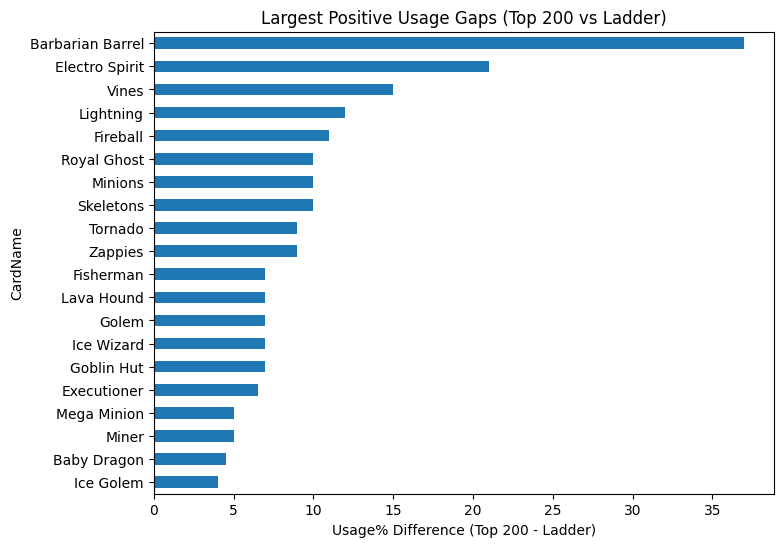

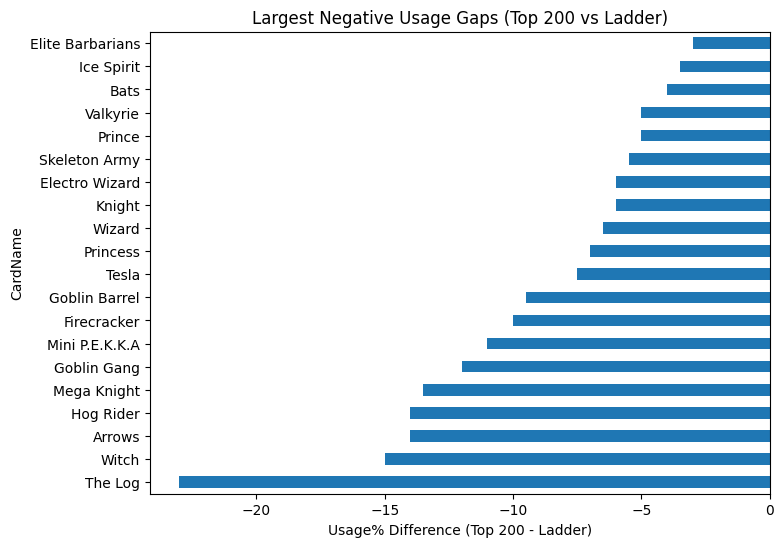


Largest positive usage gaps (Top 200 vs All Ranked):
CardName
Barbarian Barrel    18.0
Electro Spirit      13.0
Vines                9.0
Minions              8.0
Fireball             8.0
Executioner          6.0
Golden Knight        6.0
Ice Wizard           6.0
Royal Ghost          6.0
Skeletons            6.0
Goblin Hut           5.0
Lava Hound           5.0
Lightning            5.0
Tower Princess       5.0
Baby Dragon          4.5
Fisherman            4.0
Zappies              4.0
Mega Minion          4.0
Minion Horde         4.0
Tornado              3.0
Name: Top200_minus_AllRanked, dtype: float64

Largest negative usage gaps (Top 200 vs All Ranked):
CardName
Arrows           -14.0
The Log          -14.0
Goblin Gang      -11.0
Hog Rider         -8.0
Mega Knight       -6.5
Firecracker       -5.0
Witch             -4.5
Electro Wizard    -4.0
Princess          -4.0
Goblin Barrel     -3.5
Ice Spirit        -3.5
Poison            -3.0
Tesla             -3.0
Dagger Duchess    -3.0
Bats   

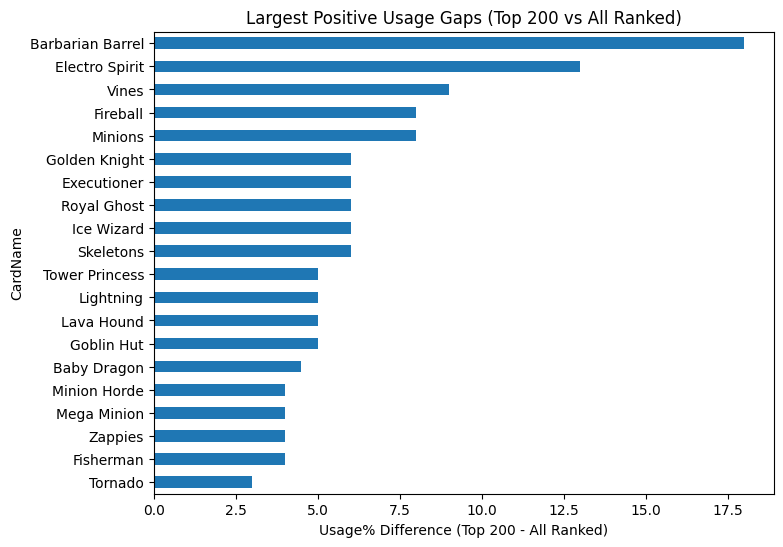

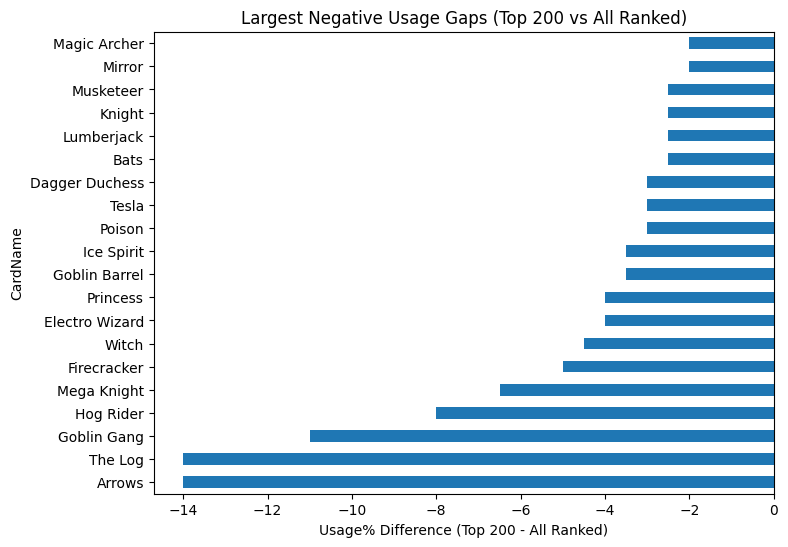


Cards where Top 200 win more than Ladder (Top 200 vs Ladder):
CardName
Battle Healer        10.0
Phoenix               8.0
Barbarians            7.0
Goblin Machine        6.0
Elixir Collector      6.0
Lava Hound            6.0
Graveyard             5.0
Goblin Drill          4.5
Heal Spirit           4.0
Elixir Golem          4.0
Golem                 3.0
Goblin Demolisher     3.0
Tornado               3.0
Electro Giant         3.0
Berserker             3.0
Mega Minion           2.0
Giant                 2.0
Goblin Curse          2.0
Fire Spirit           2.0
Lightning             2.0
Name: Top200_minus_Ladder, dtype: float64

Cards where Top 200 win less than Ladder (Top 200 vs Ladder):
CardName
Goblin Giant      -43.5
Skeleton Barrel   -28.0
Little Prince     -24.0
Furnace           -23.0
Witch             -19.0
Giant Skeleton    -11.0
Mega Knight       -10.5
Goblin Gang        -9.0
Princess           -9.0
Electro Wizard     -8.0
Inferno Tower      -8.0
P.E.K.K.A          -8.0
Cannon

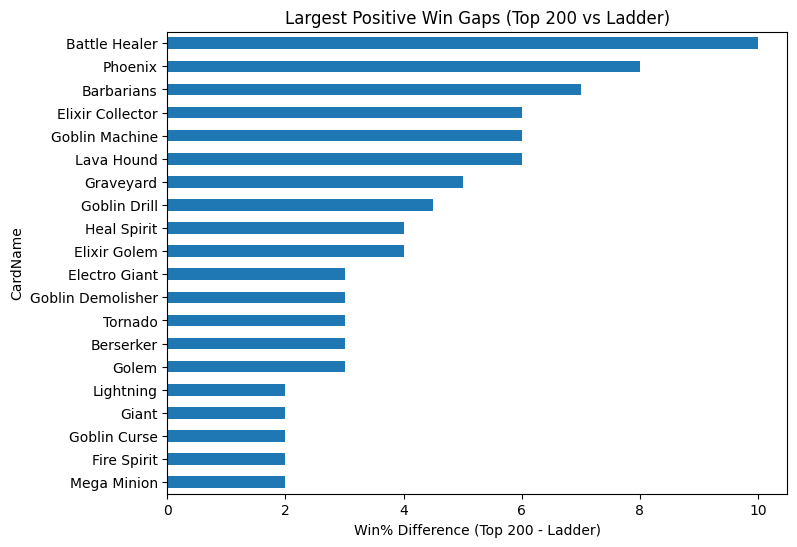

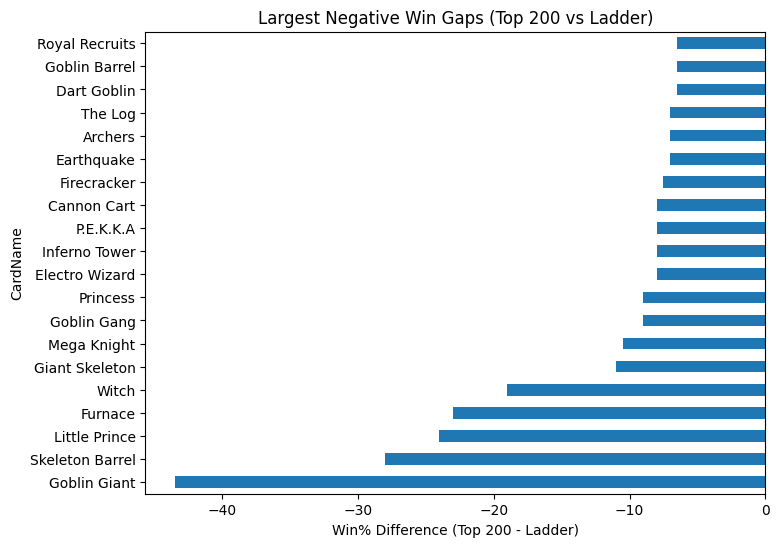


Cards where Top 200 win more than All Ranked (Top 200 vs All Ranked):
CardName
Barbarians        7.5
Electro Dragon    4.5
Valkyrie          4.5
Rocket            4.0
Fire Spirit       4.0
Ice Spirit        3.5
Wizard            2.5
Berserker         2.0
Tesla             2.0
Goblin Drill      1.5
Battle Healer     1.0
Mother Witch      1.0
Phoenix           1.0
Miner             1.0
Cannon            1.0
Royal Giant       1.0
Bomber            0.5
Musketeer         0.5
Skeletons         0.5
Executioner       0.5
Name: Top200_minus_AllRanked, dtype: float64

Cards where Top 200 win less than All Ranked (Top 200 vs All Ranked):
CardName
Goblin Giant       -50.0
Skeleton Barrel    -25.5
Furnace            -21.5
Little Prince      -19.0
Witch              -13.5
Giant Skeleton     -10.0
Skeleton Dragons    -9.0
Cannon Cart         -9.0
Clone               -8.0
Bandit              -7.0
Spirit Empress      -7.0
P.E.K.K.A           -6.5
Goblin Machine      -6.0
Night Witch         -6.0
Gobli

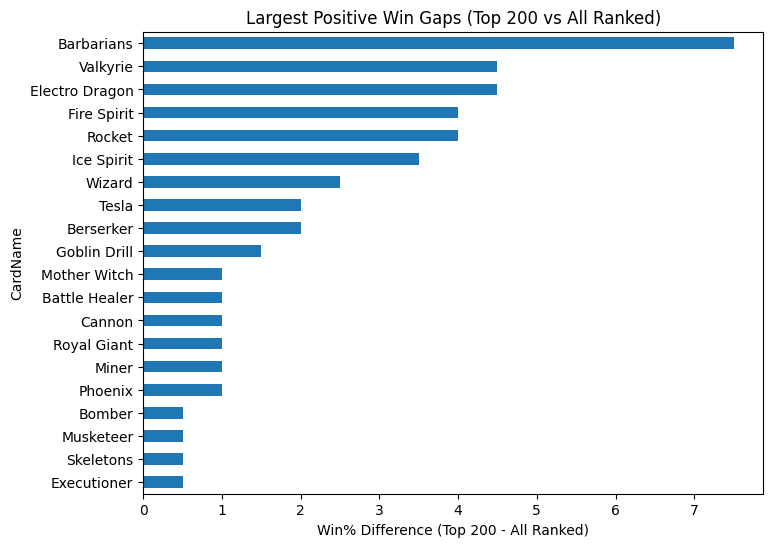

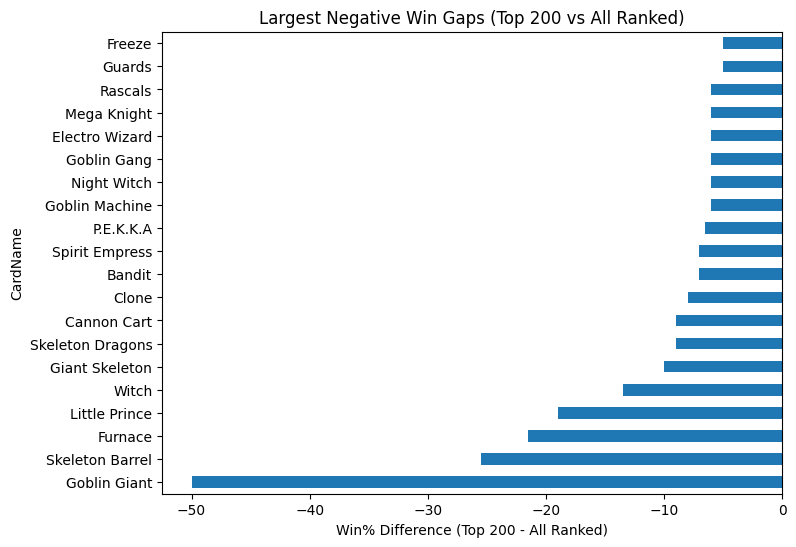

In [ ]:

# Defines or assigns variables: largest_negative, largest_positive, top200_better, top200_worse, usage_diff, usage_pivot, win_diff, win_pivot
# Uses matplotlib pyplot functions: figure, show, title, xlabel
usage_pivot = card_stats_agg.pivot_table(
    index="CardName",
    columns="Bracket",
    values="UsagePct",
    aggfunc="mean"
)
win_pivot = card_stats_agg.pivot_table(
    index="CardName",
    columns="Bracket",
    values="WinPct",
    aggfunc="mean"
)
if {"Top 200", "Ladder"}.issubset(usage_pivot.columns):
    usage_diff = (usage_pivot["Top 200"] - usage_pivot["Ladder"]).dropna()
    usage_diff = usage_diff.rename("Top200_minus_Ladder")

    largest_positive = usage_diff.sort_values(ascending=False).head(20)
    largest_negative = usage_diff.sort_values(ascending=True).head(20)

    print("\nLargest positive usage gaps (Top 200 vs Ladder):")
    print(largest_positive.round(2))

    print("\nLargest negative usage gaps (Top 200 vs Ladder):")
    print(largest_negative.round(2))

    plt.figure(figsize=(8, 6))
    largest_positive.sort_values().plot(kind="barh")
    plt.xlabel("Usage% Difference (Top 200 - Ladder)")
    plt.title("Largest Positive Usage Gaps (Top 200 vs Ladder)")
    plt.show()


    plt.figure(figsize=(8, 6))
    largest_negative.sort_values().plot(kind="barh")
    plt.xlabel("Usage% Difference (Top 200 - Ladder)")
    plt.title("Largest Negative Usage Gaps (Top 200 vs Ladder)")
    plt.show()

else:
    print("\nvalue missing")
if {"Top 200", "All Ranked"}.issubset(usage_pivot.columns):
    usage_diff = (usage_pivot["Top 200"] - usage_pivot["All Ranked"]).dropna()
    usage_diff = usage_diff.rename("Top200_minus_AllRanked")

    largest_positive = usage_diff.sort_values(ascending=False).head(20)
    largest_negative = usage_diff.sort_values(ascending=True).head(20)

    print("\nLargest positive usage gaps (Top 200 vs All Ranked):")
    print(largest_positive.round(2))

    print("\nLargest negative usage gaps (Top 200 vs All Ranked):")
    print(largest_negative.round(2))

    plt.figure(figsize=(8, 6))
    largest_positive.sort_values().plot(kind="barh")
    plt.xlabel("Usage% Difference (Top 200 - All Ranked)")
    plt.title("Largest Positive Usage Gaps (Top 200 vs All Ranked)")
    plt.show()


    plt.figure(figsize=(8, 6))
    largest_negative.sort_values().plot(kind="barh")
    plt.xlabel("Usage% Difference (Top 200 - All Ranked)")
    plt.title("Largest Negative Usage Gaps (Top 200 vs All Ranked)")
    plt.show()
else:
    print("\nvalue missing")

if {"Top 200", "Ladder"}.issubset(win_pivot.columns):
    win_diff = (win_pivot["Top 200"] - win_pivot["Ladder"]).dropna()
    win_diff = win_diff.rename("Top200_minus_Ladder")

    top200_better = win_diff.sort_values(ascending=False).head(20)
    top200_worse = win_diff.sort_values(ascending=True).head(20)

    print("\nCards where Top 200 win more than Ladder (Top 200 vs Ladder):")
    print(top200_better.round(2))

    print("\nCards where Top 200 win less than Ladder (Top 200 vs Ladder):")
    print(top200_worse.round(2))

    plt.figure(figsize=(8, 6))
    top200_better.sort_values().plot(kind="barh")
    plt.xlabel("Win% Difference (Top 200 - Ladder)")
    plt.title("Largest Positive Win Gaps (Top 200 vs Ladder)")
    plt.show()


    plt.figure(figsize=(8, 6))
    top200_worse.sort_values().plot(kind="barh")
    plt.xlabel("Win% Difference (Top 200 - Ladder)")
    plt.title("Largest Negative Win Gaps (Top 200 vs Ladder)")
    plt.show()


else:
    print("\nvalue missing")
if {"Top 200", "All Ranked"}.issubset(win_pivot.columns):
    win_diff = (win_pivot["Top 200"] - win_pivot["All Ranked"]).dropna()
    win_diff = win_diff.rename("Top200_minus_AllRanked")

    top200_better = win_diff.sort_values(ascending=False).head(20)
    top200_worse = win_diff.sort_values(ascending=True).head(20)

    print("\nCards where Top 200 win more than All Ranked (Top 200 vs All Ranked):")
    print(top200_better.round(2))

    print("\nCards where Top 200 win less than All Ranked (Top 200 vs All Ranked):")
    print(top200_worse.round(2))


    plt.figure(figsize=(8, 6))
    top200_better.sort_values().plot(kind="barh")
    plt.xlabel("Win% Difference (Top 200 - All Ranked)")
    plt.title("Largest Positive Win Gaps (Top 200 vs All Ranked)")
    plt.show()


    plt.figure(figsize=(8, 6))
    top200_worse.sort_values().plot(kind="barh")
    plt.xlabel("Win% Difference (Top 200 - All Ranked)")
    plt.title("Largest Negative Win Gaps (Top 200 vs All Ranked)")
    plt.show()
else:
    print("\nvalue missing")


In [ ]:
# Defines or assigns variables: card_cols, card_counts, deck_cards_long, deck_stats, merged_freq_top200, meta_cols, most_used_decks, name_map, top10_cards, top200_stats
meta_cols = ["DeckName", "Bracket", "WinPct", "UsagePCT", "Rating"]
card_cols = [c for c in decks.columns if c not in meta_cols]

print("\nNumber of decks:", decks.shape[0])
deck_stats = decks[["WinPct", "UsagePCT", "Rating"]].agg(["mean", "min", "max"])
print("\nDeck-level stats (mean / min / max):")
print(deck_stats.round(2))


most_used_decks = (
    decks.sort_values("UsagePCT", ascending=False)[["DeckName", "WinPct", "UsagePCT"]]
    .head(5)
)
print("\nMost used decks (by UsagePCT):")
print(most_used_decks.round(2))


deck_cards_long = decks.melt(
    id_vars=meta_cols,
    value_vars=card_cols,
    var_name="Slot",
    value_name="CardName"
)


name_map = {
    "Log": "The Log",
    "Gaint Snowball": "Giant Snowball",
}
deck_cards_long["CardName"] = deck_cards_long["CardName"].replace(name_map)

print("\nNumber of card slots:", deck_cards_long.shape[0])
print("Unique cards across all decks:", deck_cards_long["CardName"].nunique())


card_counts = (
    deck_cards_long["CardName"]
    .value_counts()
    .rename_axis("CardName")
    .reset_index(name="Count")
)

print("\nTop 10 most common cards in the 29 decks:")
print(card_counts.head(10))


top10_cards = card_counts.head(10)["CardName"]

top200_stats = card_stats_agg[card_stats_agg["Bracket"] == "Top 200"][
    ["CardName", "UsagePct", "WinPct"]
].rename(
    columns={
        "UsagePct": "Top200_UsagePct",
        "WinPct": "Top200_WinPct",
    }
)

merged_freq_top200 = (
    card_counts[card_counts["CardName"].isin(top10_cards)]
    .merge(top200_stats, on="CardName", how="left")
)

print("\nTop 10 most common deck cards merged with Top 200 card stats:")
print(merged_freq_top200.sort_values("Count", ascending=False).round(2))



Number of decks: 29

Deck-level stats (mean / min / max):
      WinPct  UsagePCT  Rating
mean   51.18      0.97   51.45
min    42.20      0.10   30.00
max    55.10      3.70   61.00

Most used decks (by UsagePCT):
        DeckName  WinPct  UsagePCT
4   EvoRGFishboy    50.9       3.7
1       EvoRHogs    51.7       2.2
0    GolemEvoBBD    52.3       2.0
9       HogMM2.6    49.0       1.8
14  EvoRGFishboy    51.7       1.8

Number of card slots: 319
Unique cards across all decks: 148

Top 10 most common cards in the 29 decks:
           CardName  Count
0         Skeletons     20
1           The Log     13
2          Fireball     12
3  Barbarian Barrel     11
4        Ice Spirit     10
5            Cannon     10
6         Hog Rider      9
7    Electro Spirit      9
8         Musketeer      7
9         Ice Golem      7

Top 10 most common deck cards merged with Top 200 card stats:
           CardName  Count  Top200_UsagePct  Top200_WinPct
0         Skeletons     20             19.0        

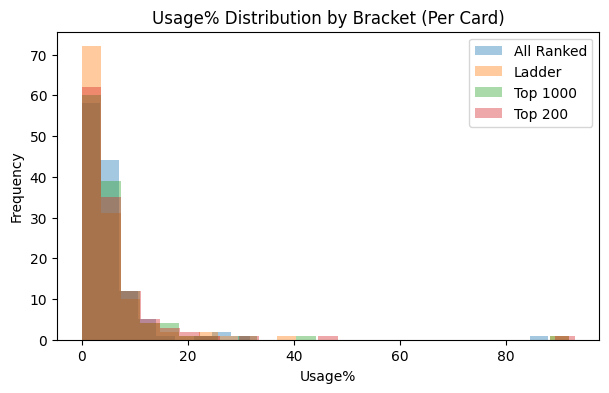

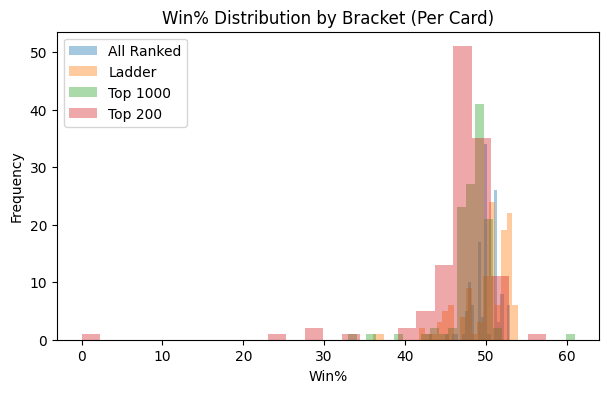

In [ ]:
brackets = sorted(card_stats_agg["Bracket"].unique())
# Defines or assigns variables: brackets, sub
# Uses matplotlib pyplot functions: figure, hist, legend, show, title, xlabel, ylabel

plt.figure(figsize=(7, 4))
for b in brackets:
    sub = card_stats_agg[card_stats_agg["Bracket"] == b]["UsagePct"].dropna()
    plt.hist(sub, bins=25, alpha=0.4, label=b)
plt.xlabel("Usage%")
plt.ylabel("Frequency")
plt.title("Usage% Distribution by Bracket (Per Card)")
plt.legend()
plt.show()


plt.figure(figsize=(7, 4))
for b in brackets:
    sub = card_stats_agg[card_stats_agg["Bracket"] == b]["WinPct"].dropna()
    plt.hist(sub, bins=25, alpha=0.4, label=b)
plt.xlabel("Win%")
plt.ylabel("Frequency")
plt.title("Win% Distribution by Bracket (Per Card)")
plt.legend()
plt.show()

/tmp/ipython-input-3319865525.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=brackets, showfliers=True)


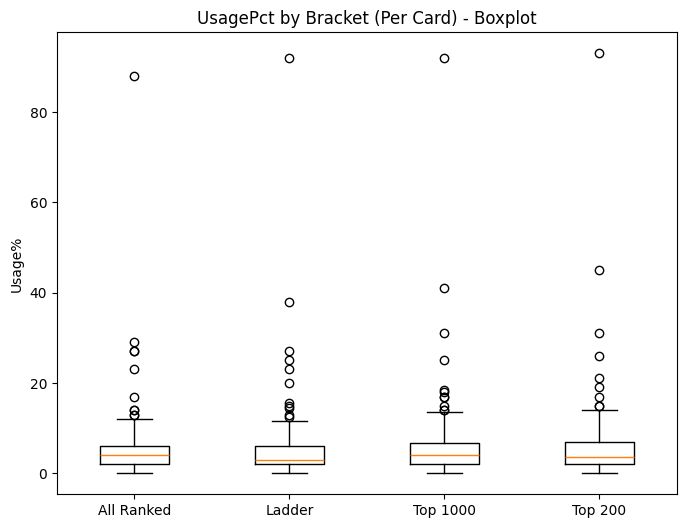

/tmp/ipython-input-3319865525.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=brackets, showfliers=True)


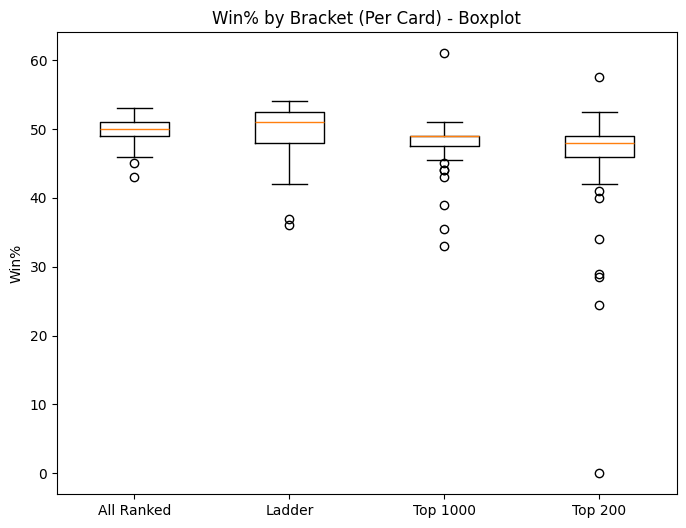

In [ ]:
plt.figure(figsize=(8, 6))
data = [card_stats_agg[card_stats_agg["Bracket"] == b]["UsagePct"].dropna() for b in brackets]
plt.boxplot(data, labels=brackets, showfliers=True)
plt.ylabel("Usage%")
plt.title("UsagePct by Bracket (Per Card) - Boxplot")
plt.show()

# Defines or assigns variables: data
# Uses matplotlib pyplot functions: boxplot, figure, show, title, ylabel

plt.figure(figsize=(8, 6))
data = [card_stats_agg[card_stats_agg["Bracket"] == b]["WinPct"].dropna() for b in brackets]
plt.boxplot(data, labels=brackets, showfliers=True)
plt.ylabel("Win%")
plt.title("Win% by Bracket (Per Card) - Boxplot")
plt.show()

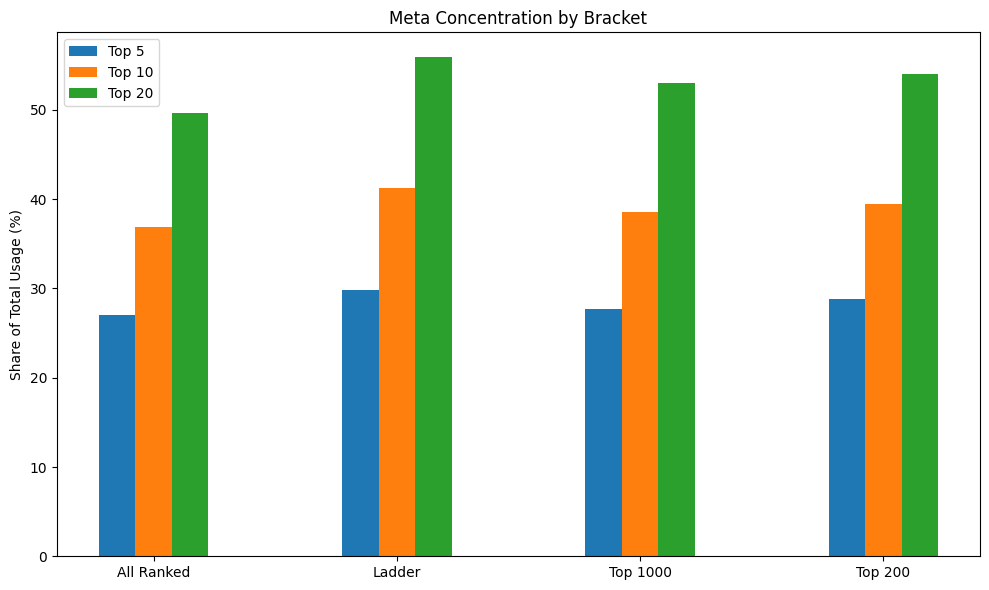

In [ ]:
# Defines or assigns variables: vals, width, x
# Uses matplotlib pyplot functions: bar, figure, legend, show, tight_layout, title, xticks, ylabel

plt.figure(figsize=(10, 6))
width = 0.15
x = np.arange(len(brackets))
for i, n in enumerate([5, 10, 20]):
    vals = [meta_conc.loc[b, f"Top {n} share"] for b in brackets]
    plt.bar(x + i * width, vals, width=width, label=f"Top {n}")
plt.xticks(x + width, brackets)
plt.ylabel("Share of Total Usage (%)")
plt.title("Meta Concentration by Bracket")
plt.legend()
plt.tight_layout()
plt.show()

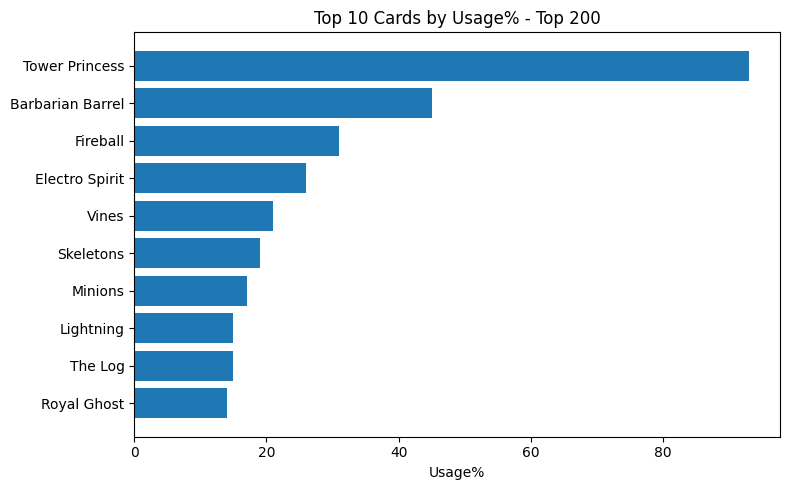

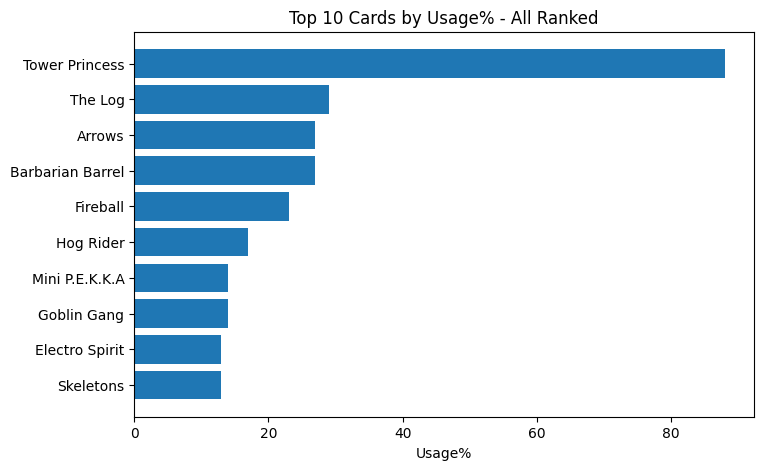

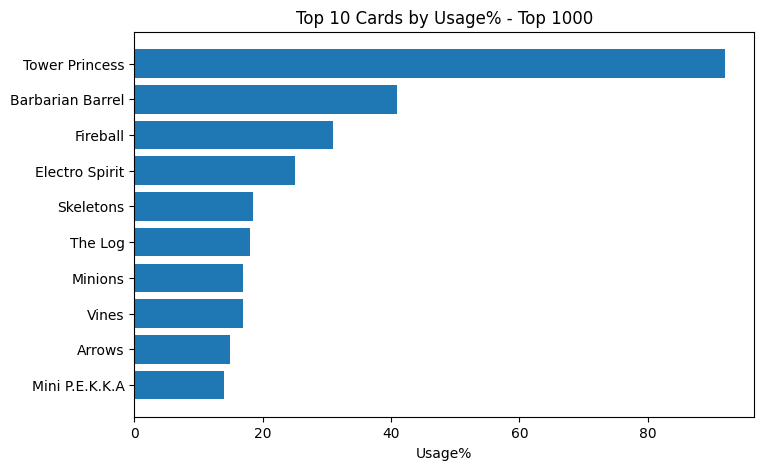

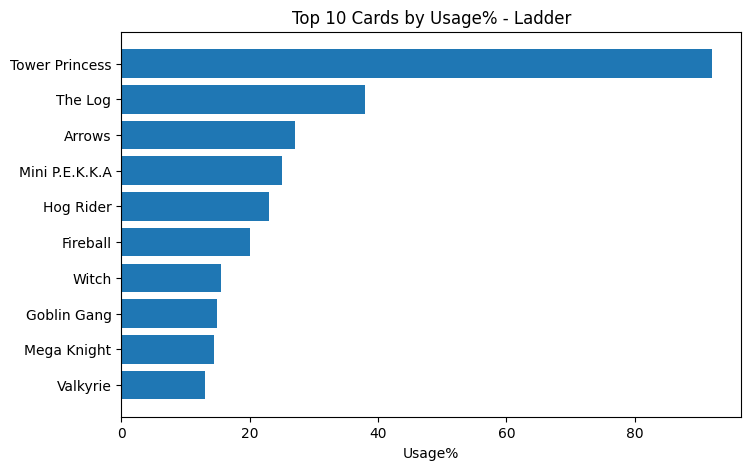

In [ ]:
# Defines or assigns variables: Ladder, all_ranked, top1000, top200
# Uses matplotlib pyplot functions: barh, figure, gca, show, tight_layout, title, xlabel


top200 = card_stats_agg[card_stats_agg["Bracket"] == "Top 200"].copy()
top200 = top200.sort_values("UsagePct", ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.barh(top200["CardName"], top200["UsagePct"])
plt.gca().invert_yaxis()
plt.xlabel("Usage%")
plt.title("Top 10 Cards by Usage% - Top 200")
plt.tight_layout()
plt.show()

all_ranked = card_stats_agg[card_stats_agg["Bracket"] == "All Ranked"].copy()
all_ranked = all_ranked.sort_values("UsagePct", ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.barh(all_ranked["CardName"], all_ranked["UsagePct"])
plt.gca().invert_yaxis()
plt.xlabel("Usage%")
plt.title("Top 10 Cards by Usage% - All Ranked")
plt.show()


top1000 = card_stats_agg[card_stats_agg["Bracket"] == "Top 1000"].copy()
top1000 = top1000.sort_values("UsagePct", ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.barh(top1000["CardName"], top1000["UsagePct"])
plt.gca().invert_yaxis()
plt.xlabel("Usage%")
plt.title("Top 10 Cards by Usage% - Top 1000")
plt.show()

Ladder = card_stats_agg[card_stats_agg["Bracket"] == "Ladder"].copy()
Ladder = Ladder.sort_values("UsagePct", ascending=False).head(10)

plt.figure(figsize=(8, 5))
plt.barh(Ladder["CardName"], Ladder["UsagePct"])
plt.gca().invert_yaxis()
plt.xlabel("Usage%")
plt.title("Top 10 Cards by Usage% - Ladder")
plt.show()

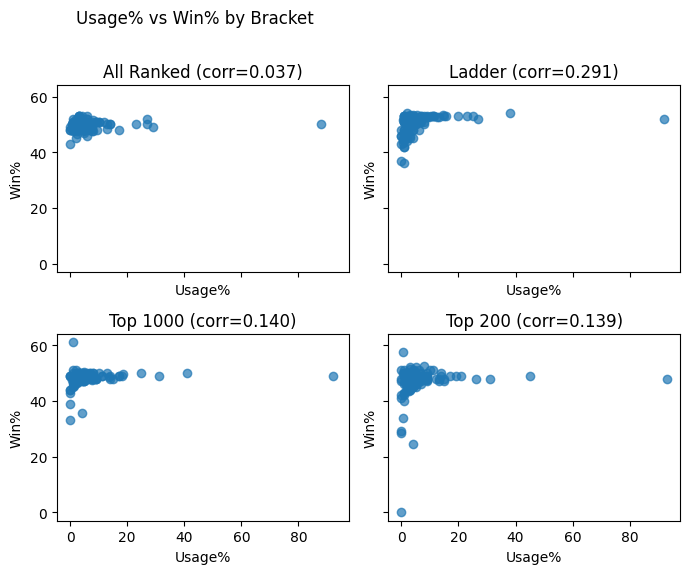

In [ ]:
# Defines or assigns variables: axes, sub
# Uses matplotlib pyplot functions: show, subplots, suptitle, tight_layout

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axes = axes.ravel()

for ax, b in zip(axes, brackets):
    sub = card_stats_agg[card_stats_agg["Bracket"] == b]
    ax.scatter(sub["UsagePct"], sub["WinPct"], alpha=0.7)
    ax.set_title(f"{b} (corr={corrs.get(b, np.nan):.3f})")
    ax.set_xlabel("Usage%")
    ax.set_ylabel("Win%")

plt.suptitle("Usage% vs Win% by Bracket")
plt.tight_layout(rect=[0.3, 0.03, 1, 0.97])
plt.show()

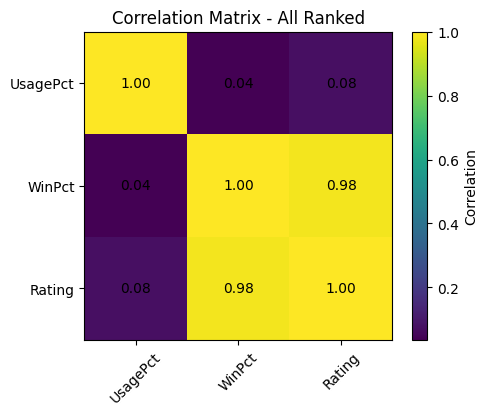

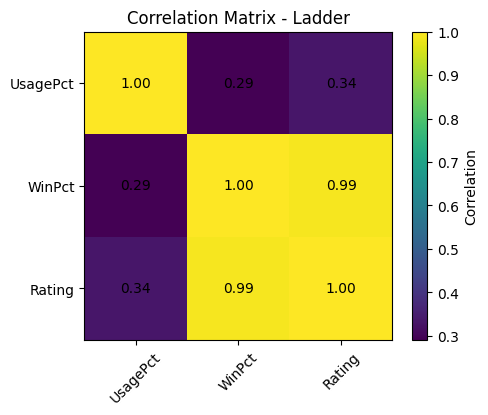

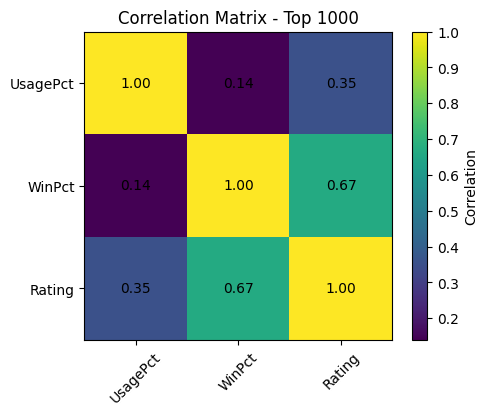

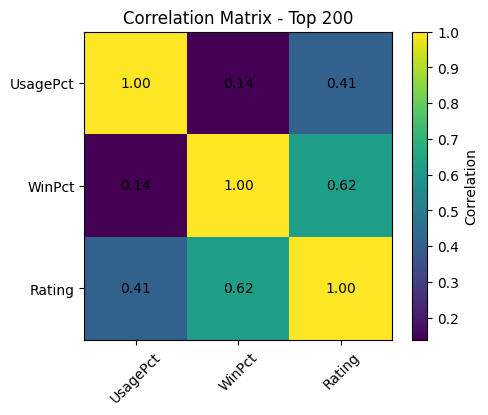

In [ ]:
# Defines or assigns variables: corr_mat, numeric_cols, sub, val
# Uses matplotlib pyplot functions: colorbar, figure, imshow, show, text, title, xticks, yticks


numeric_cols = ["UsagePct", "WinPct", "Rating"]
for b in brackets:
    sub = card_stats_agg[card_stats_agg["Bracket"] == b][numeric_cols].dropna()
    if sub.shape[0] > 1:
        corr_mat = sub.corr()
        plt.figure(figsize=(5, 4))
        plt.imshow(corr_mat, interpolation="nearest")
        plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=45)
        plt.yticks(range(len(numeric_cols)), numeric_cols)
        plt.colorbar(label="Correlation")
        plt.title(f"Correlation Matrix - {b}")
        for i in range(len(numeric_cols)):
            for j in range(len(numeric_cols)):
                val = corr_mat.iloc[i, j]
                plt.text(j, i, f"{val:.2f}", ha="center", va="center")

        plt.show()


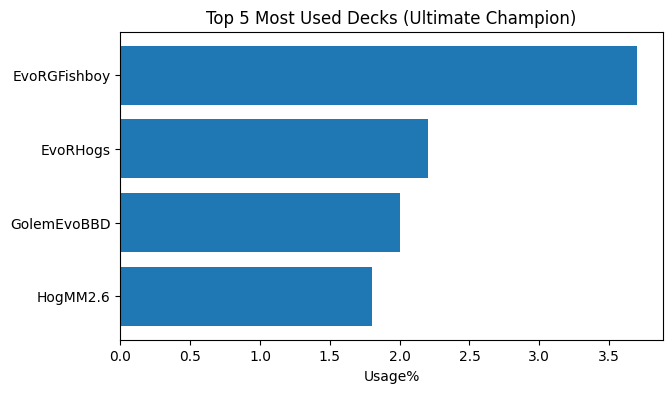

In [ ]:
# Uses matplotlib pyplot functions: barh, figure, gca, show, title, xlabel
plt.figure(figsize=(7, 4))
plt.barh(most_used_decks["DeckName"], most_used_decks["UsagePCT"])
plt.gca().invert_yaxis()
plt.xlabel("Usage%")
plt.title("Top 5 Most Used Decks (Ultimate Champion)")
plt.show()

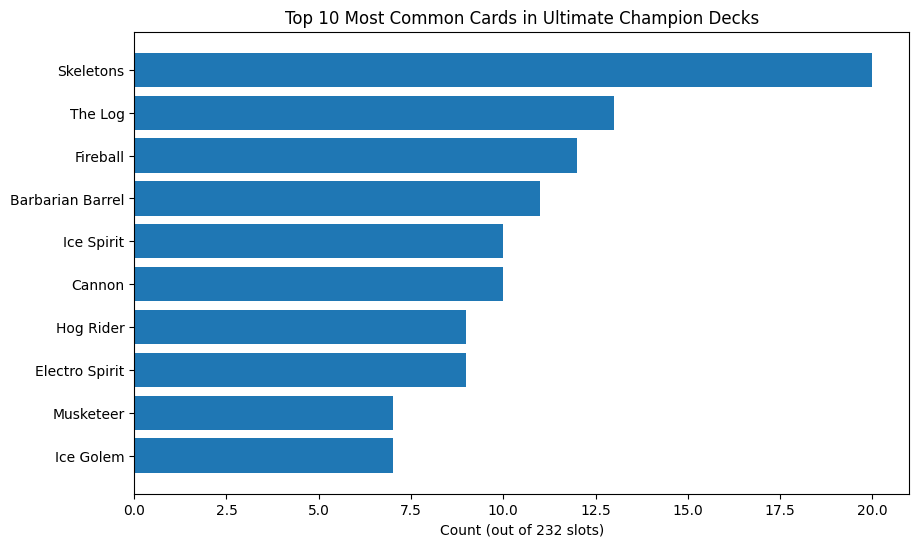

In [ ]:
# Defines or assigns variables: top10_counts
# Uses matplotlib pyplot functions: barh, figure, gca, show, title, xlabel
top10_counts = card_counts.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10_counts["CardName"], top10_counts["Count"])
plt.gca().invert_yaxis()
plt.xlabel("Count (out of 232 slots)")
plt.title("Top 10 Most Common Cards in Ultimate Champion Decks")
plt.show()

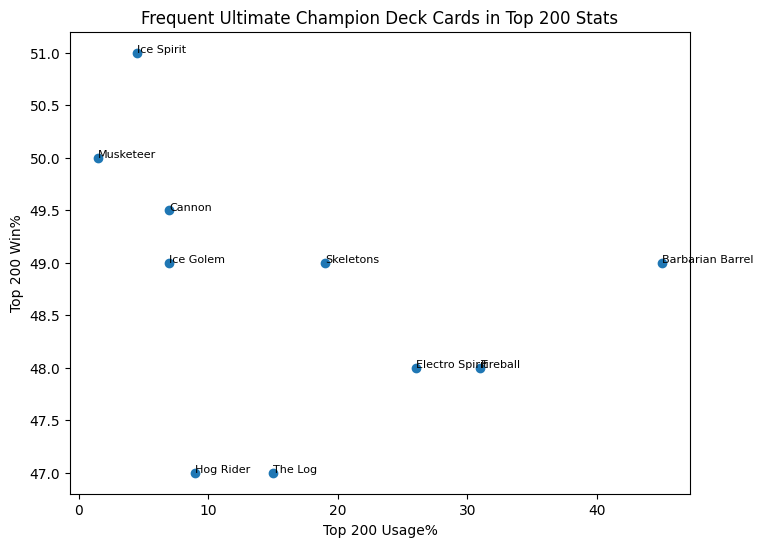

In [ ]:
# Defines or assigns variables: freq_with_stats
# Uses matplotlib pyplot functions: figure, scatter, show, text, title, xlabel, ylabel

freq_with_stats = merged_freq_top200.dropna(subset=["Top200_UsagePct", "Top200_WinPct"])
if not freq_with_stats.empty:
    plt.figure(figsize=(8, 6))
    plt.scatter(freq_with_stats["Top200_UsagePct"], freq_with_stats["Top200_WinPct"])
    for _, row in freq_with_stats.iterrows():
        plt.text(row["Top200_UsagePct"], row["Top200_WinPct"], row["CardName"], fontsize=8)
    plt.xlabel("Top 200 Usage%")
    plt.ylabel("Top 200 Win%")
    plt.title("Frequent Ultimate Champion Deck Cards in Top 200 Stats")
    plt.show()